In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests

url = "https://iex.lewagon.com/stable/stock/aapl/chart/3m"
api_data = requests.get(url).json()
apple_df = pd.DataFrame(api_data)

In [3]:
apple_df.head(3)

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
0,152.95,155.040,152.28,154.010,2022-07-25,AAPL,53623945,HISTORICAL_PRICES,AAPL,,...,152.28,53623945,153.796,152.738,154.825,152.069,53623945,"Jul 25, 22",0.00,0.0000
1,151.60,153.085,150.80,152.265,2022-07-26,AAPL,55138691,HISTORICAL_PRICES,AAPL,,...,150.80,55138691,152.054,151.390,152.873,150.591,55138691,"Jul 26, 22",-1.35,-0.0088
2,156.79,157.330,152.16,152.580,2022-07-27,AAPL,78620688,HISTORICAL_PRICES,AAPL,,...,152.16,78620688,152.368,156.573,157.112,151.949,78620688,"Jul 27, 22",5.19,0.0342


In [4]:
apple_df["date"] = pd.to_datetime(apple_df["date"], format="%Y-%m-%d")

In [5]:
type(apple_df["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
apple_df.set_index('date', inplace=True)

<AxesSubplot: xlabel='date'>

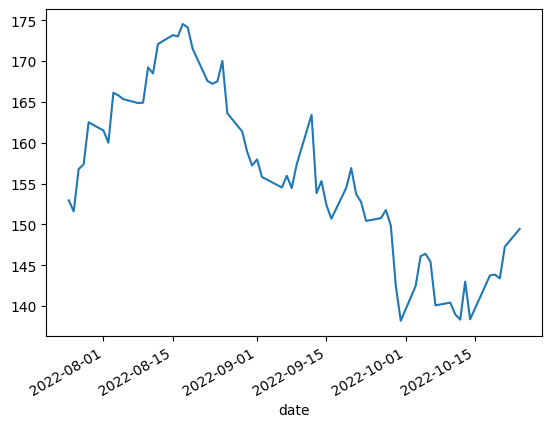

In [7]:
apple_df['close'].plot()

<AxesSubplot: xlabel='date'>

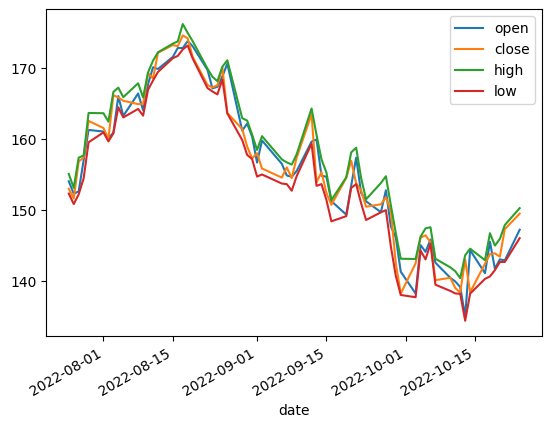

In [8]:
apple_df[['open', 'close', 'high', 'low']].plot()

<AxesSubplot: xlabel='date'>

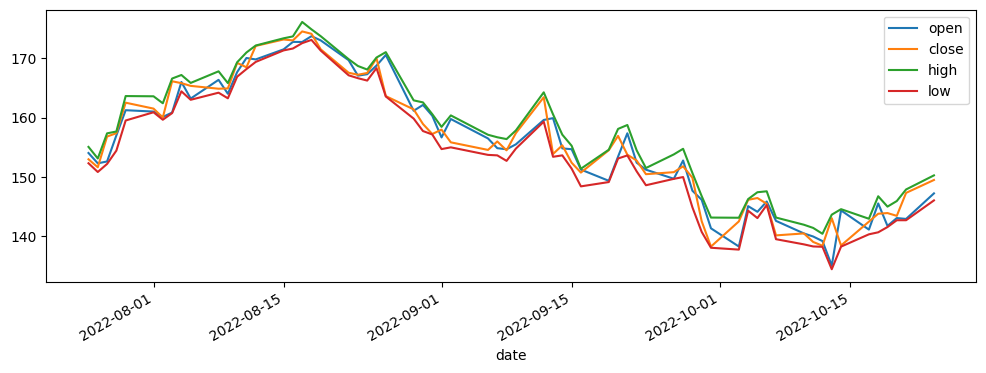

In [9]:
apple_df[['open', 'close', 'high', 'low']].plot(figsize=(12,4))

In [10]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/gulecs/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/gulecs/code/gulecsec/data-stock-market-api/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

============================== 3 passed in 0.26s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master



## Amazon stock prices since last year?

In [12]:
url = "https://iex.lewagon.com/stable/stock/amzn/chart/1y"
api_data = requests.get(url).json()
amazon_df = pd.DataFrame(api_data)

In [20]:
amazon_df["date"] = pd.to_datetime(amazon_df["date"], format="%Y-%m-%d")

In [29]:
amazon_df

,close,high,low,open,symbol,volume,id,key,subkey,date,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,priceDate
0,166.0185,167.3900,164.8850,166.7500,AMZN,44519120.0,HISTORICAL_PRICES,AMZN,,2021-10-25,...,2225956,166.7500,166.0185,167.3900,164.8850,44519120.0,"Oct 25, 21",0.000,0.0000,NaN
1,168.8035,170.8060,167.1990,167.4755,AMZN,53966840.0,HISTORICAL_PRICES,AMZN,,2021-10-26,...,2698342,167.4755,168.8035,170.8060,167.1990,53966840.0,"Oct 26, 21",2.785,0.0168,NaN
2,169.6245,171.8500,168.5727,169.4000,AMZN,54044480.0,HISTORICAL_PRICES,AMZN,,2021-10-27,...,2702224,169.4000,169.6245,171.8500,168.5727,54044480.0,"Oct 27, 21",0.821,0.0049,NaN
3,172.3285,173.9500,169.3000,170.1048,AMZN,114174660.0,HISTORICAL_PRICES,AMZN,,2021-10-28,...,5708733,170.1048,172.3285,173.9500,169.3000,114174660.0,"Oct 28, 21",2.704,0.0159,NaN
4,168.6215,168.7410,163.6660,165.0010,AMZN,129721540.0,HISTORICAL_PRICES,AMZN,,2021-10-29,...,6486077,165.0010,168.6215,168.7410,163.6660,129721540.0,"Oct 29, 21",-3.707,-0.0215,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,116.3200,119.4100,114.8800,119.3400,AMZN,65760.0,HISTORICAL_PRICES,AMZN,,2022-10-18,...,65760,119.3400,116.3200,119.4100,114.8800,65760.0,"Oct 18, 22",2.530,0.0222,2022-10-18
248,115.0700,116.5932,113.2200,114.7100,AMZN,47198122.0,HISTORICAL_PRICES,AMZN,,2022-10-19,...,47198122,114.7100,115.0700,116.5932,113.2200,47198122.0,"Oct 19, 22",-1.250,-0.0107,2022-10-19
249,115.2500,118.2400,113.5100,113.8300,AMZN,48795104.0,HISTORICAL_PRICES,AMZN,,2022-10-20,...,48795104,113.8300,115.2500,118.2400,113.5100,48795104.0,"Oct 20, 22",0.180,0.0016,2022-10-20
250,119.2700,119.5300,115.1200,115.9800,AMZN,38759.0,HISTORICAL_PRICES,AMZN,,2022-10-21,...,38759,115.9800,119.2700,119.5300,115.1200,38759.0,"Oct 21, 22",4.020,0.0349,2022-10-21


In [26]:
amazon_21_22 = amazon_df[amazon_df["date"] > "2020-12-31"]

<AxesSubplot: >

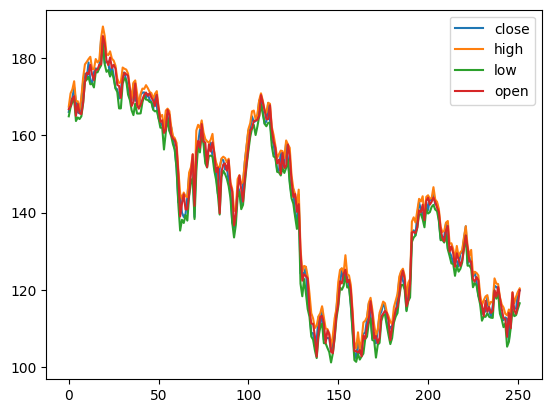

In [28]:
amazon_21_22[["close", "high", "low", "open"]].plot()

<AxesSubplot: >

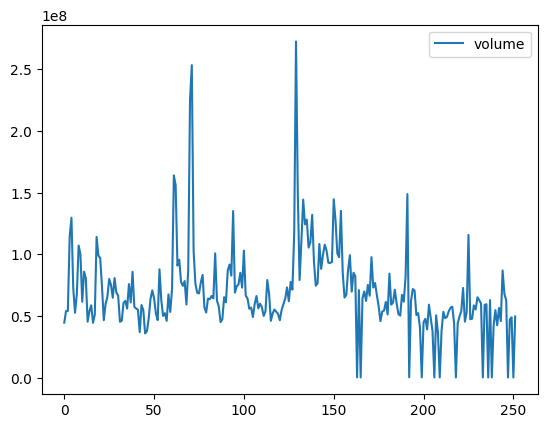

In [30]:
amazon_21_22[['volume']].plot()